<a href="https://colab.research.google.com/github/TatyanaFilimonova/CM/blob/main/%D0%A2%D0%B5%D0%BC%D0%B03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df[df.area <= 3000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
157,5495000,2817,4,2,2,no,yes,yes,no,no,1,no,furnished
184,5110000,3000,3,2,2,yes,yes,yes,no,no,0,no,furnished
185,5110000,3000,3,1,2,yes,no,yes,no,no,0,no,unfurnished
197,4956000,2800,3,2,2,no,no,yes,no,yes,1,no,semi-furnished
207,4900000,3000,3,1,2,yes,no,yes,no,yes,0,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished


<Axes: xlabel='area', ylabel='price'>

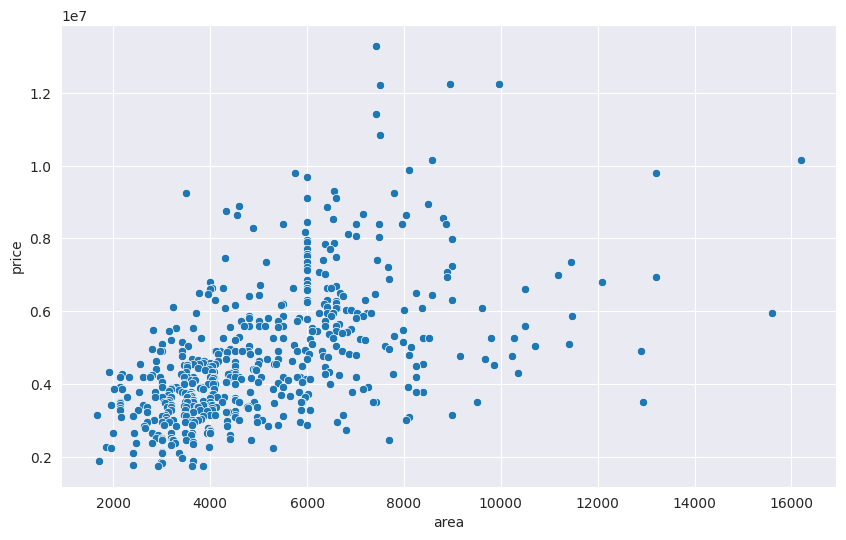

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="area", y="price", data=df)

In [ ]:
def h(w_0, w_1, x):
    return w_0 + w_1 * x

def loss(w_0, w_1, x, y):
    return (h(w_0, w_1, x) - y)**2

def cost(w_0, w_1, df):
    m = len(df)
    cost = np.zeros_like(w_0)
    for _, row in df.iterrows():
        cost += loss(w_0, w_1, row.area, row.price)
    cost = cost / (2*m)

    return cost

<Axes: >

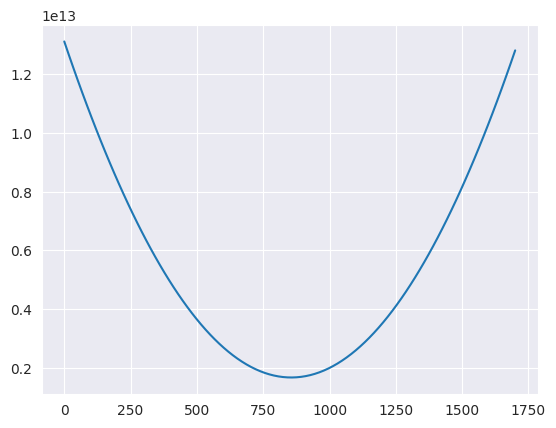

In [ ]:
number_of_samples = 100

w_0 = np.zeros(number_of_samples, dtype=float)
w_1_range = np.linspace(0, 1700, num=number_of_samples)
cost_values = cost(w_0, w_1_range, df)
sns.lineplot(x=w_1_range, y=cost_values)

In [ ]:
import plotly.express as px

fig = px.line(x=w_1_range, y=cost_values, title='Cost function')
fig.show()

In [ ]:
cost_values.min()

1673511221420.372

# 3D

In [ ]:
grid_w_0 = np.linspace(-10, 10, 40)
grid_w_1 = np.linspace(0, 1700, 40)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)
cost_w0_w1 = cost(w_0, w_1, df)

In [ ]:
normalized_df = df.copy(deep=True)
normalized_df.area = (df.area - df.area.mean()) / df.area.std()
normalized_df.price = (df.price - df.price.mean()) / df.price.std()

grid_w_0 = np.linspace(-10, 10, 20)
grid_w_1 = np.linspace(-10, 10, 20)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)
cost_w0_w1 = cost(w_0, w_1, normalized_df)

In [ ]:
normalized_df.area.min()

-1.6130478379496513

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=w_0, y=w_1, z=cost_w0_w1)])
fig.update_layout(
    title='House modeling', autosize=False,
    width=1000, height=1000,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title='w_0',
        yaxis_title='w_1',
        zaxis_title='Cost',
    ),
)
fig.show()

<Axes: xlabel='area', ylabel='price'>

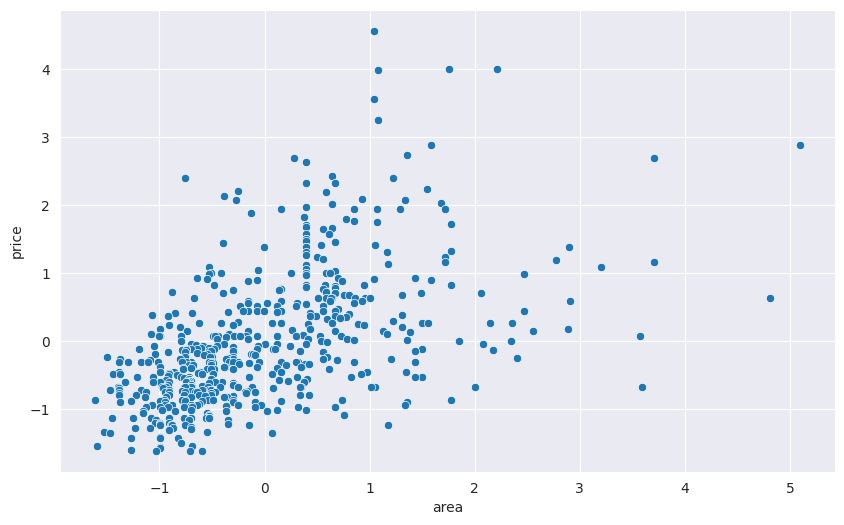

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="area", y="price", data=normalized_df)

# Multi-feature regression

In [ ]:
class MyLinearRegression:

    def __init__(self, learning_rate=0.01, n_iters=1000):

        self.lr = learning_rate
        self.n_iters = n_iters

        self.weights = None
        self.bias = None
        self.costs = []

    def gradient_descent(self, X, y):
        n_samples = X.shape[0]

        for _ in range(self.n_iters):

            # predicted value with the current weights (default is zeros)
            y_predicted = np.dot(X, self.weights) + self.bias

            difference = y_predicted - y

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, difference)
            db = (1 / n_samples) * np.sum(difference)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # cost value of the current iteration
            cost = (1/n_samples) * np.sum(difference**2)
            self.costs.append(cost)

    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # reshaping target variable (m,1) to (m,)
        y = y.reshape(y.shape[0])

        print(f"X     --> shape: {X.shape}")
        print(f"y     --> shape: {y.shape}")
        print(f"THETA --> shape: {self.weights.shape}")

        self.gradient_descent(X, y)


    def predict(self, X):
        if X[0] <= -2.327287135729532:
            return "Try again"
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [ ]:
normalized_df = df.copy(deep=True)
normalized_df.area = (df.area - df.area.mean()) / df.area.std()
normalized_df.price = (df.price - df.price.mean()) / df.price.std()
normalized_df.bedrooms = (df.bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
normalized_df.bathrooms = (df.bathrooms - df.bathrooms.mean()) / df.bathrooms.std()

In [ ]:
(100 - df.area.mean()) / df.area.std()

-2.327287135729532

In [ ]:
X_train.shape

(545, 3)

X     --> shape: (545, 3)
y     --> shape: (545,)
THETA --> shape: (3,)


<Axes: >

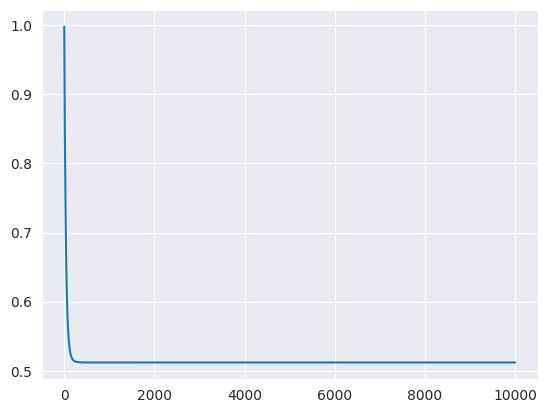

In [ ]:
X_train = np.array(normalized_df[['area', 'bedrooms', 'bathrooms']])
y_train = np.array(normalized_df['price'])

linear_regression_model = MyLinearRegression(learning_rate=0.01, n_iters=10000)
linear_regression_model.fit(X_train, y_train)

sns.lineplot(x=range(linear_regression_model.n_iters), y=linear_regression_model.costs)

# Test

In [ ]:
normalized_df = df.copy(deep=True)

area, bedrooms, bathrooms = 50, 1, 1

test_area = (area - df.area.mean()) / df.area.std()
test_bedrooms = (bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
test_bathrooms = (bathrooms - df.bathrooms.mean()) / df.bathrooms.std()

normalized_prediction = linear_regression_model.predict(np.array([[test_area, test_bedrooms, test_bathrooms]]))

In [ ]:
predicted_price = normalized_prediction[0] * df.price.std() + df.price.mean()
normalized_prediction, predicted_price

(array([-1.67238395]), 1638636.061606783)

# T-SNE

# Learning

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([
    [1, 1],
    [1, 2],
    [2, 2],
    [2, 3]
])

y = np.dot(X, np.array([1, 2])) + 3

regressor = LinearRegression().fit(X, y)

print(regressor.predict(np.array([[3, 5]])))

[16.]


In [ ]:
regressor = LinearRegression().fit(X_train, y_train)

In [ ]:
test_example = np.array([[test_area, test_bedrooms, test_bathrooms]])

In [ ]:
predicted_price = regressor.predict(test_example) * df.price.std() + df.price.mean()
normalized_prediction, predicted_price

(array([-1.67238395]), array([1638636.06160681]))